In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("F:/DEPI Graduation Project/FMCG_2022_2024.csv")

In [3]:
df.head()

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190757 entries, 0 to 190756
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   date             190757 non-null  object 
 1   sku              190757 non-null  object 
 2   brand            190757 non-null  object 
 3   segment          190757 non-null  object 
 4   category         190757 non-null  object 
 5   channel          190757 non-null  object 
 6   region           190757 non-null  object 
 7   pack_type        190757 non-null  object 
 8   price_unit       190757 non-null  float64
 9   promotion_flag   190757 non-null  int64  
 10  delivery_days    190757 non-null  int64  
 11  stock_available  190757 non-null  int64  
 12  delivered_qty    190757 non-null  int64  
 13  units_sold       190757 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 20.4+ MB


In [5]:
df.shape

(190757, 14)

In [6]:
df.columns

Index(['date', 'sku', 'brand', 'segment', 'category', 'channel', 'region',
       'pack_type', 'price_unit', 'promotion_flag', 'delivery_days',
       'stock_available', 'delivered_qty', 'units_sold'],
      dtype='object')

In [7]:
df.describe()

,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
count,190757.000000,190757.000000,190757.000000,190757.000000,190757.000000,190757.000000
mean,5.251979,0.149200,3.004860,157.697652,179.333655,19.919709
std,2.166705,0.356287,1.414626,52.736104,40.037475,11.770077
min,1.500000,0.000000,1.000000,-12.000000,-11.000000,-25.000000
25%,3.380000,0.000000,2.000000,124.000000,152.000000,12.000000
50%,5.250000,0.000000,3.000000,155.000000,179.000000,18.000000
75%,7.130000,0.000000,4.000000,192.000000,206.000000,25.000000
max,9.000000,1.000000,5.000000,405.000000,366.000000,139.000000


There is a negative values in stock_available and delievered_qty and units_sold need modifications


In [8]:
df['sku'].unique()

array(['MI-006', 'MI-026', 'YO-029', 'YO-005', 'YO-012', 'YO-014',
       'YO-001', 'RE-004', 'RE-007', 'RE-015', 'MI-023', 'JU-021',
       'YO-009', 'SN-027', 'YO-003', 'MI-022', 'YO-016', 'RE-025',
       'SN-010', 'RE-017', 'SN-013', 'YO-020', 'SN-019', 'MI-002',
       'MI-011', 'YO-024', 'MI-008', 'SN-028', 'YO-018', 'SN-030'],
      dtype=object)

In [9]:
df['brand'].unique()

array(['MiBrand1', 'MiBrand4', 'YoBrand4', 'YoBrand2', 'YoBrand1',
       'YoBrand3', 'ReBrand1', 'ReBrand4', 'MiBrand3', 'JuBrand3',
       'SnBrand2', 'ReBrand2', 'SnBrand3', 'MiBrand2'], dtype=object)

In [10]:
df['segment'].unique()

array(['Milk-Seg3', 'Milk-Seg2', 'Yogurt-Seg2', 'Yogurt-Seg1',
       'Yogurt-Seg3', 'ReadyMeal-Seg2', 'ReadyMeal-Seg1', 'Juice-Seg3',
       'SnackBar-Seg3', 'ReadyMeal-Seg3', 'SnackBar-Seg2',
       'SnackBar-Seg1', 'Milk-Seg1'], dtype=object)

In [11]:
df['category'].unique()

array(['Milk', 'Yogurt', 'ReadyMeal', 'Juice', 'SnackBar'], dtype=object)

In [12]:
df['channel'].unique()

array(['Retail', 'Discount', 'E-commerce'], dtype=object)

In [13]:
df['region'].unique()

array(['PL-Central', 'PL-North', 'PL-South'], dtype=object)

In [14]:
df['pack_type'].unique()

array(['Multipack', 'Single', 'Carton'], dtype=object)

There is no data recorded in different ways in all categorical data

In [15]:
df.duplicated().sum()

np.int64(0)

There is no duplicate data 

In [16]:
numeric_columns = df.select_dtypes(include=['number'])

In [17]:
negative_counts = (numeric_columns < 0).sum()
negative_counts

price_unit         0
promotion_flag     0
delivery_days      0
stock_available    3
delivered_qty      3
units_sold         3
dtype: int64

In [18]:
df = df[(numeric_columns >= 0).all(axis=1)]

In [19]:
df.describe()

,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold
count,190754.000000,190754.000000,190754.000000,190754.000000,190754.000000,190754.000000
mean,5.251989,0.149197,3.004839,157.700237,179.336585,19.920211
std,2.166692,0.356284,1.414626,52.732487,40.030968,11.769429
min,1.500000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,3.380000,0.000000,2.000000,124.000000,152.000000,12.000000
50%,5.250000,0.000000,3.000000,155.000000,179.000000,18.000000
75%,7.130000,0.000000,4.000000,192.000000,206.000000,25.000000
max,9.000000,1.000000,5.000000,405.000000,366.000000,139.000000


In [20]:
df.shape

(190754, 14)

3 rows of negative values in numeric colums are removed

In [21]:
df.isnull().sum()

date               0
sku                0
brand              0
segment            0
category           0
channel            0
region             0
pack_type          0
price_unit         0
promotion_flag     0
delivery_days      0
stock_available    0
delivered_qty      0
units_sold         0
dtype: int64

<Axes: xlabel='delivery_days'>

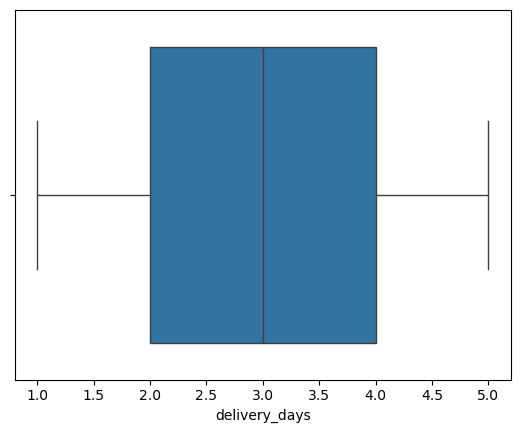

In [22]:
sns.boxplot(x = 'delivery_days' , data = df)

<Axes: xlabel='stock_available'>

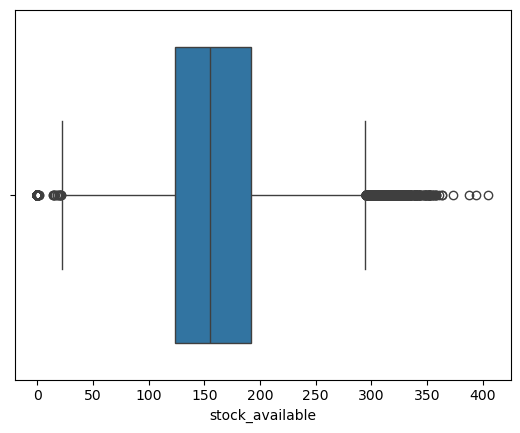

In [23]:
sns.boxplot(x = 'stock_available' , data = df)

In [24]:
Q1_stock = df['stock_available'].quantile(0.25)
Q3_stock  = df['stock_available'].quantile(0.75)
IQR_stock  = Q3_stock  - Q1_stock 
lower_bound_stock  = Q1_stock  - 1.5 * IQR_stock 
upper_bound_stock  = Q3_stock  + 1.5 * IQR_stock 
outliers_stock  = df[(df['stock_available'] < lower_bound_stock) | (df['stock_available'] > upper_bound_stock)]
num_outliers_stock = outliers_stock.shape[0]
num_outliers_stock

4911

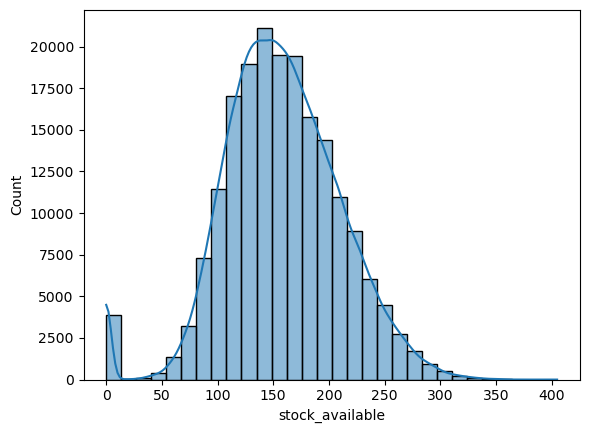

In [25]:
sns.histplot(x='stock_available', data=df, bins=30, kde=True)
plt.show()

We winsorizing or cappping the 1% of data to be replaced by 0.99 quantile 

In [26]:
upper_cap = df['stock_available'].quantile(0.99)
df['stock_available_capped'] = np.where(df['stock_available'] > upper_cap, upper_cap, df['stock_available'])

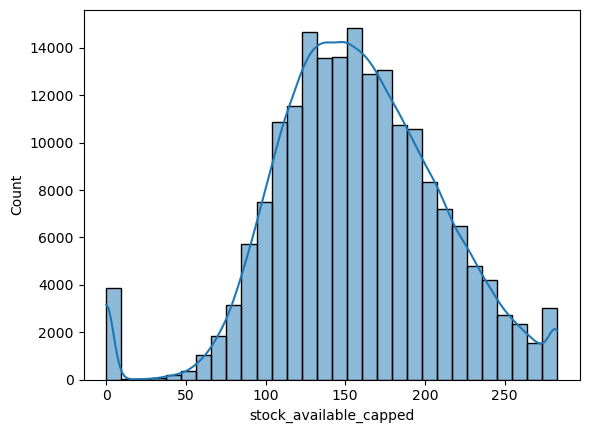

In [27]:
sns.histplot(x='stock_available_capped', data=df, bins=30, kde=True)
plt.show()

<Axes: xlabel='delivered_qty'>

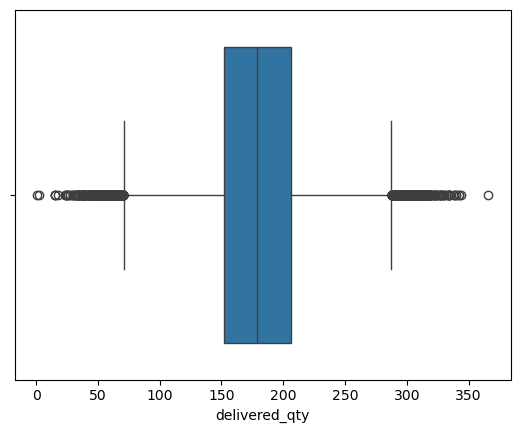

In [28]:
sns.boxplot(x = 'delivered_qty' , data = df)

In [29]:
Q1_delivery = df['delivered_qty'].quantile(0.25)
Q3_delivery  = df['delivered_qty'].quantile(0.75)
IQR_delivery  = Q3_delivery  - Q1_delivery 
lower_bound_delivery  = Q1_delivery  - 1.5 * IQR_delivery 
upper_bound_delivery  = Q3_delivery  + 1.5 * IQR_delivery 
outliers_delivery  = df[(df['delivered_qty'] < lower_bound_delivery) | (df['delivered_qty'] > upper_bound_delivery)]
num_outliers_delivery = outliers_delivery.shape[0]
num_outliers_delivery

1286

In [30]:
df['delivered_qty'].describe()

count    190754.000000
mean        179.336585
std          40.030968
min           1.000000
25%         152.000000
50%         179.000000
75%         206.000000
max         366.000000
Name: delivered_qty, dtype: float64

In [31]:
df['delivered_qty'].value_counts()

delivered_qty
175    1950
188    1916
185    1914
170    1904
182    1901
       ... 
325       1
31        1
42        1
2         1
18        1
Name: count, Length: 318, dtype: int64

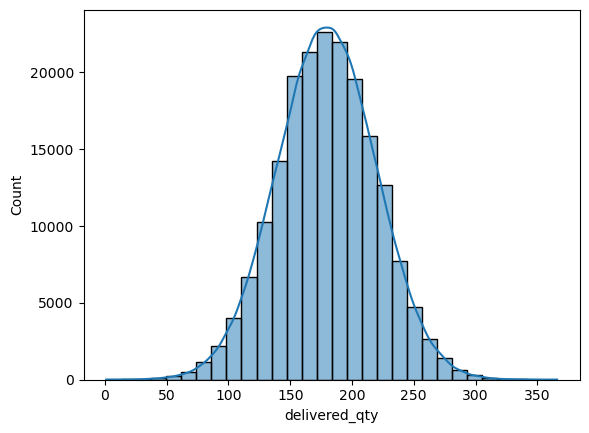

In [32]:
sns.histplot(x='delivered_qty', data=df, bins=30, kde=True)
plt.show()

In [33]:
lower_cap = df['delivered_qty'].quantile(0.01)  # 1st percentile
upper_cap = df['delivered_qty'].quantile(0.99)  # 99th percentile

df['delivered_qty_capped'] = df['delivered_qty'].clip(lower=lower_cap, upper=upper_cap)

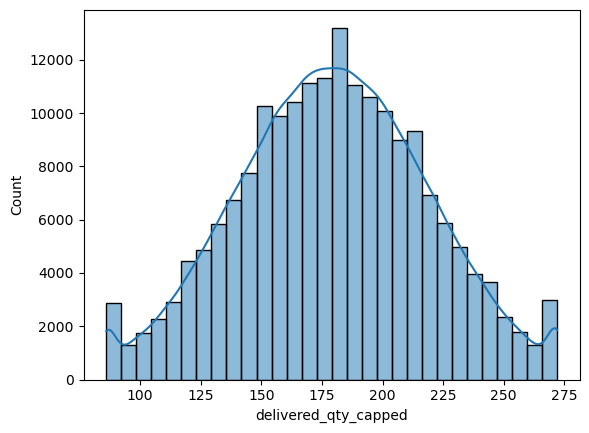

In [34]:
sns.histplot(x='delivered_qty_capped', data=df, bins=30, kde=True)
plt.show()

<Axes: xlabel='units_sold'>

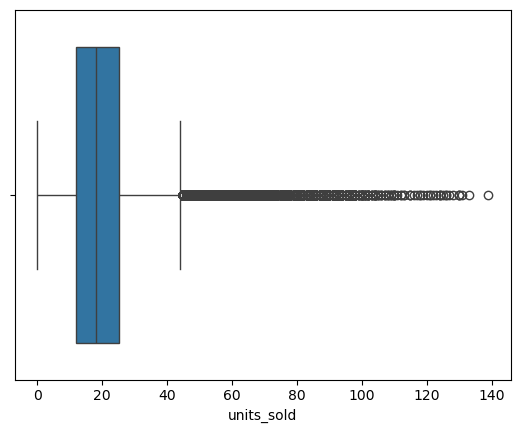

In [35]:
sns.boxplot(x = 'units_sold' , data = df)

In [36]:
Q1_sold = df['units_sold'].quantile(0.25)
Q3_sold  = df['units_sold'].quantile(0.75)
IQR_sold  = Q3_sold  - Q1_sold 
lower_bound_sold  = Q1_sold  - 1.5 * IQR_sold 
upper_bound_sold  = Q3_sold  + 1.5 * IQR_sold 
outliers_sold  = df[(df['units_sold'] < lower_bound_sold) | (df['units_sold'] > upper_bound_sold)]
num_outliers_sold = outliers_sold.shape[0]
num_outliers_sold

7707

In [37]:
df['units_sold'].describe()

count    190754.000000
mean         19.920211
std          11.769429
min           0.000000
25%          12.000000
50%          18.000000
75%          25.000000
max         139.000000
Name: units_sold, dtype: float64

In [38]:
df['units_sold_log'] = np.log1p(df['units_sold'])

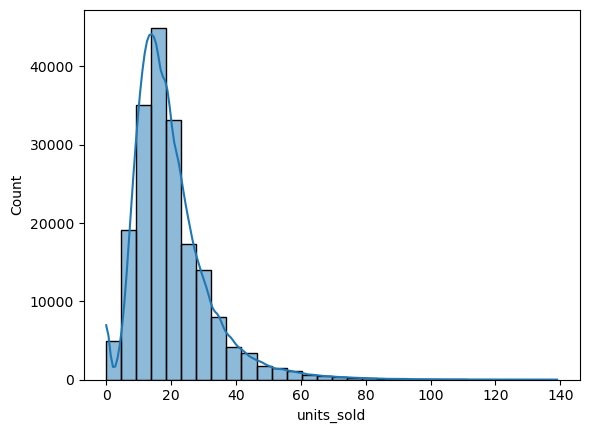

In [39]:
sns.histplot(x='units_sold', data=df, bins=30, kde=True)
plt.show()

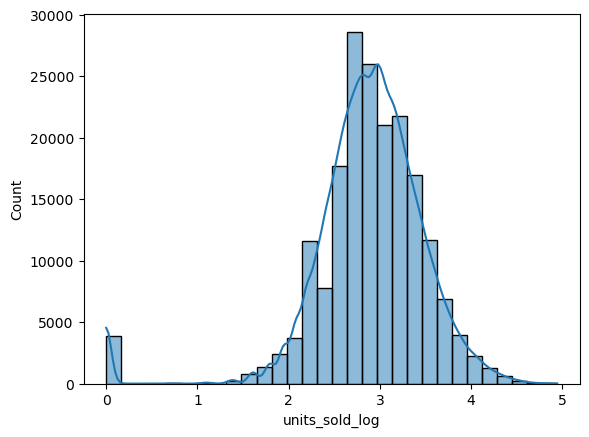

In [40]:
sns.histplot(x='units_sold_log', data=df, bins=30, kde=True)
plt.show()

In [41]:
df[['stock_available', 'delivered_qty', 'units_sold_log']].corr()

,stock_available,delivered_qty,units_sold_log
stock_available,1.000000,0.668894,0.699202
delivered_qty,0.668894,1.000000,0.355537
units_sold_log,0.699202,0.355537,1.000000


In [42]:
df[['stock_available', 'delivered_qty_capped', 'units_sold_log']].corr()

,stock_available,delivered_qty_capped,units_sold_log
stock_available,1.000000,0.667557,0.699202
delivered_qty_capped,0.667557,1.000000,0.353556
units_sold_log,0.699202,0.353556,1.000000


There is no missing data in all columns


In [43]:
df['Total_price per transaction'] = df['price_unit'] * df['units_sold']

In [44]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 190754 entries, 0 to 190756
Data columns (total 18 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   date                         190754 non-null  object 
 1   sku                          190754 non-null  object 
 2   brand                        190754 non-null  object 
 3   segment                      190754 non-null  object 
 4   category                     190754 non-null  object 
 5   channel                      190754 non-null  object 
 6   region                       190754 non-null  object 
 7   pack_type                    190754 non-null  object 
 8   price_unit                   190754 non-null  float64
 9   promotion_flag               190754 non-null  int64  
 10  delivery_days                190754 non-null  int64  
 11  stock_available              190754 non-null  int64  
 12  delivered_qty                190754 non-null  int64  
 13  unit

In [45]:
df['Total_price per transaction'] = df['Total_price per transaction'].astype(float)

In [46]:
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,stock_available_capped,delivered_qty_capped,units_sold_log,Total_price per transaction
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9,141.0,128,2.302585,21.42
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0,0.0,129,0.000000,0.00
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8,118.0,161,2.197225,32.00
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7,81.0,114,2.079442,36.12
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12,148.0,204,2.564949,91.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,2,190,163,25,190.0,163,3.258097,63.75
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,5,141,131,19,141.0,131,2.995732,114.19
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,5,0,132,0,0.0,132,0.000000,0.00
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,1,2,211,201,40,211.0,201,3.713572,77.20


In [47]:
def stock_status(row):
    if row['delivered_qty'] > row['units_sold']:
        return "Overstock"
    elif row['delivered_qty'] < row['units_sold']:
        return "Stockout"
    else:
        return "Urgent restock"
        

In [48]:
df['stock status'] = df.apply(stock_status, axis=1)

In [49]:
df["sell_through_rate"] = (df["units_sold"] / df["stock_available"]) * 100

In [50]:
df.sample(30)

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,stock_available_capped,delivered_qty_capped,units_sold_log,Total_price per transaction,stock status,sell_through_rate
180557,2024-11-17,YO-018,YoBrand2,Yogurt-Seg1,Yogurt,E-commerce,PL-South,Single,8.63,0,3,146,183,11,146.0,183,2.484907,94.93,Overstock,7.534247
188859,2024-12-23,MI-022,MiBrand3,Milk-Seg2,Milk,Discount,PL-Central,Carton,2.16,0,5,232,200,15,232.0,200,2.772589,32.40,Overstock,6.465517
44113,2023-03-29,RE-004,ReBrand1,ReadyMeal-Seg2,ReadyMeal,Retail,PL-North,Single,8.70,0,3,163,236,15,163.0,236,2.772589,130.50,Overstock,9.202454
55337,2023-05-21,RE-017,ReBrand2,ReadyMeal-Seg2,ReadyMeal,E-commerce,PL-North,Multipack,3.39,0,1,222,193,29,222.0,193,3.401197,98.31,Overstock,13.063063
36386,2023-02-13,YO-020,YoBrand3,Yogurt-Seg2,Yogurt,E-commerce,PL-North,Multipack,2.75,0,3,227,222,27,227.0,222,3.332205,74.25,Overstock,11.894273
100925,2023-12-06,YO-009,YoBrand4,Yogurt-Seg1,Yogurt,Discount,PL-South,Multipack,6.54,0,1,200,187,20,200.0,187,3.044522,130.80,Overstock,10.000000
99231,2023-11-28,SN-027,SnBrand2,SnackBar-Seg3,SnackBar,Discount,PL-Central,Carton,4.85,0,5,167,169,20,167.0,169,3.044522,97.00,Overstock,11.976048
150266,2024-07-08,MI-023,MiBrand3,Milk-Seg3,Milk,E-commerce,PL-North,Multipack,4.73,0,2,148,186,16,148.0,186,2.833213,75.68,Overstock,10.810811
94422,2023-11-07,YO-029,YoBrand4,Yogurt-Seg2,Yogurt,E-commerce,PL-Central,Single,8.14,0,2,173,168,15,173.0,168,2.772589,122.10,Overstock,8.670520
126167,2024-03-25,YO-009,YoBrand4,Yogurt-Seg1,Yogurt,E-commerce,PL-South,Multipack,1.82,1,5,108,118,31,108.0,118,3.465736,56.42,Overstock,28.703704


In [51]:
df['date'] = pd.to_datetime(df['date'])

In [52]:
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,delivery_days,stock_available,delivered_qty,units_sold,stock_available_capped,delivered_qty_capped,units_sold_log,Total_price per transaction,stock status,sell_through_rate
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,1,141,128,9,141.0,128,2.302585,21.42,Overstock,6.382979
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,3,0,129,0,0.0,129,0.000000,0.00,Overstock,NaN
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,5,118,161,8,118.0,161,2.197225,32.00,Overstock,6.779661
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,2,81,114,7,81.0,114,2.079442,36.12,Overstock,8.641975
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,4,148,204,12,148.0,204,2.564949,91.92,Overstock,8.108108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,2,190,163,25,190.0,163,3.258097,63.75,Overstock,13.157895
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,5,141,131,19,141.0,131,2.995732,114.19,Overstock,13.475177
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,5,0,132,0,0.0,132,0.000000,0.00,Overstock,NaN
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,1,2,211,201,40,211.0,201,3.713572,77.20,Overstock,18.957346


In [53]:
df['year'] = df['date'].dt.year

In [54]:
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,...,stock_available,delivered_qty,units_sold,stock_available_capped,delivered_qty_capped,units_sold_log,Total_price per transaction,stock status,sell_through_rate,year
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,...,141,128,9,141.0,128,2.302585,21.42,Overstock,6.382979,2022
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,...,0,129,0,0.0,129,0.000000,0.00,Overstock,NaN,2022
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,...,118,161,8,118.0,161,2.197225,32.00,Overstock,6.779661,2022
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,...,81,114,7,81.0,114,2.079442,36.12,Overstock,8.641975,2022
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,...,148,204,12,148.0,204,2.564949,91.92,Overstock,8.108108,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,...,190,163,25,190.0,163,3.258097,63.75,Overstock,13.157895,2024
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,...,141,131,19,141.0,131,2.995732,114.19,Overstock,13.475177,2024
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,...,0,132,0,0.0,132,0.000000,0.00,Overstock,NaN,2024
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,1,...,211,201,40,211.0,201,3.713572,77.20,Overstock,18.957346,2024


In [55]:
df['month'] = df['date'].dt.month

In [56]:
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,...,delivered_qty,units_sold,stock_available_capped,delivered_qty_capped,units_sold_log,Total_price per transaction,stock status,sell_through_rate,year,month
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,...,128,9,141.0,128,2.302585,21.42,Overstock,6.382979,2022,1
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,...,129,0,0.0,129,0.000000,0.00,Overstock,NaN,2022,1
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,...,161,8,118.0,161,2.197225,32.00,Overstock,6.779661,2022,1
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,...,114,7,81.0,114,2.079442,36.12,Overstock,8.641975,2022,1
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,...,204,12,148.0,204,2.564949,91.92,Overstock,8.108108,2022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,...,163,25,190.0,163,3.258097,63.75,Overstock,13.157895,2024,12
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,...,131,19,141.0,131,2.995732,114.19,Overstock,13.475177,2024,12
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,...,132,0,0.0,132,0.000000,0.00,Overstock,NaN,2024,12
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,1,...,201,40,211.0,201,3.713572,77.20,Overstock,18.957346,2024,12


In [57]:
df['day'] = df['date'].dt.day

In [58]:
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,...,units_sold,stock_available_capped,delivered_qty_capped,units_sold_log,Total_price per transaction,stock status,sell_through_rate,year,month,day
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,...,9,141.0,128,2.302585,21.42,Overstock,6.382979,2022,1,21
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,...,0,0.0,129,0.000000,0.00,Overstock,NaN,2022,1,21
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,...,8,118.0,161,2.197225,32.00,Overstock,6.779661,2022,1,21
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,...,7,81.0,114,2.079442,36.12,Overstock,8.641975,2022,1,21
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,...,12,148.0,204,2.564949,91.92,Overstock,8.108108,2022,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,...,25,190.0,163,3.258097,63.75,Overstock,13.157895,2024,12,31
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,...,19,141.0,131,2.995732,114.19,Overstock,13.475177,2024,12,31
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,...,0,0.0,132,0.000000,0.00,Overstock,NaN,2024,12,31
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,1,...,40,211.0,201,3.713572,77.20,Overstock,18.957346,2024,12,31


In [59]:
df['is_discounted'] = ((df['promotion_flag'] == 1) | (df['channel'] == 'Discount' ))


In [60]:
df

,date,sku,brand,segment,category,channel,region,pack_type,price_unit,promotion_flag,...,stock_available_capped,delivered_qty_capped,units_sold_log,Total_price per transaction,stock status,sell_through_rate,year,month,day,is_discounted
0,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-Central,Multipack,2.38,0,...,141.0,128,2.302585,21.42,Overstock,6.382979,2022,1,21,False
1,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-North,Single,1.55,1,...,0.0,129,0.000000,0.00,Overstock,NaN,2022,1,21,True
2,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Retail,PL-South,Carton,4.00,0,...,118.0,161,2.197225,32.00,Overstock,6.779661,2022,1,21,False
3,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-Central,Single,5.16,0,...,81.0,114,2.079442,36.12,Overstock,8.641975,2022,1,21,True
4,2022-01-21,MI-006,MiBrand1,Milk-Seg3,Milk,Discount,PL-North,Single,7.66,0,...,148.0,204,2.564949,91.92,Overstock,8.108108,2022,1,21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190752,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-North,Single,2.55,0,...,190.0,163,3.258097,63.75,Overstock,13.157895,2024,12,31,True
190753,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,Discount,PL-South,Single,6.01,0,...,141.0,131,2.995732,114.19,Overstock,13.475177,2024,12,31,True
190754,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-Central,Single,3.45,0,...,0.0,132,0.000000,0.00,Overstock,NaN,2024,12,31,False
190755,2024-12-31,SN-030,SnBrand2,SnackBar-Seg1,SnackBar,E-commerce,PL-North,Multipack,1.93,1,...,211.0,201,3.713572,77.20,Overstock,18.957346,2024,12,31,True


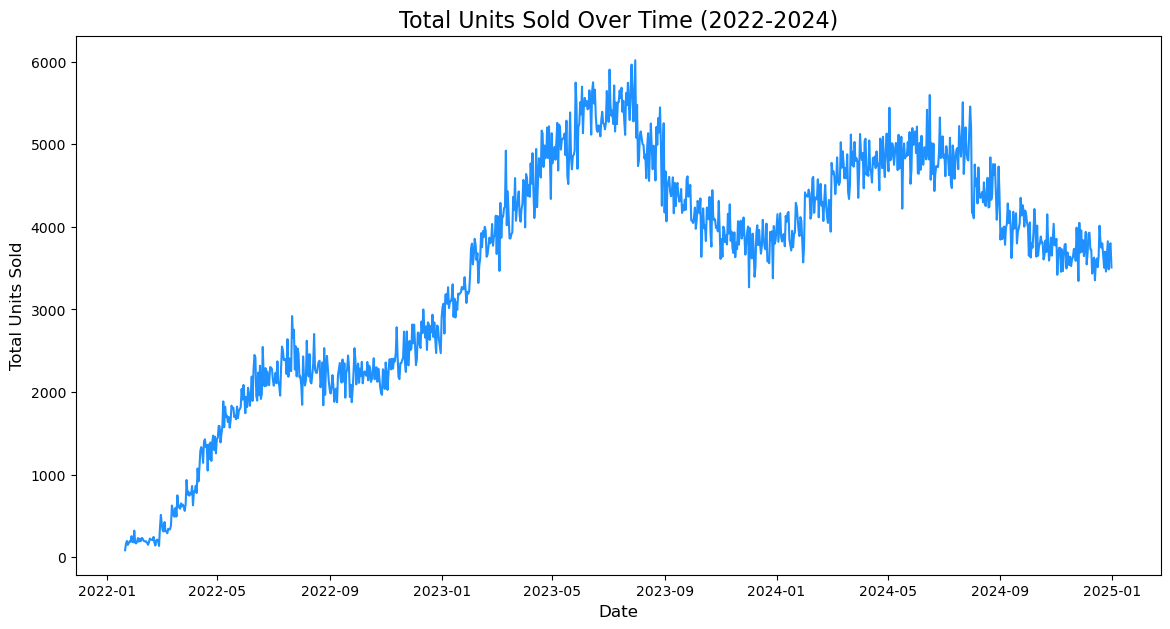

In [61]:
# Plotting total units sold over time
plt.figure(figsize=(14, 7))
sales_over_time = df.groupby('date')['units_sold'].sum()

plt.plot(sales_over_time.index, sales_over_time.values, color='dodgerblue')
plt.title('Total Units Sold Over Time (2022-2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Units Sold', fontsize=12)
plt.show()

b. Total Units Sold by Category A bar chart is perfect for comparing sales across different product categories.

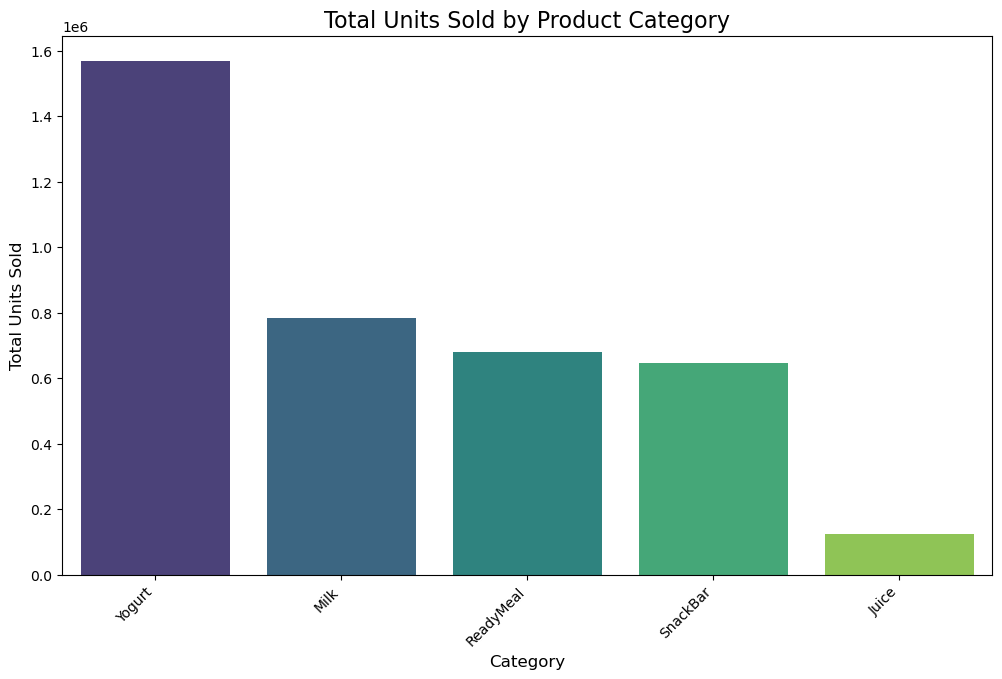

In [62]:
plt.figure(figsize=(12, 7))
category_sales = df.groupby('category')['units_sold'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values, hue=category_sales.index, palette='viridis', legend=False)
plt.title('Total Units Sold by Product Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Units Sold', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()



c. Total Revenue by category Let's see which category is performing the best in terms of sales.

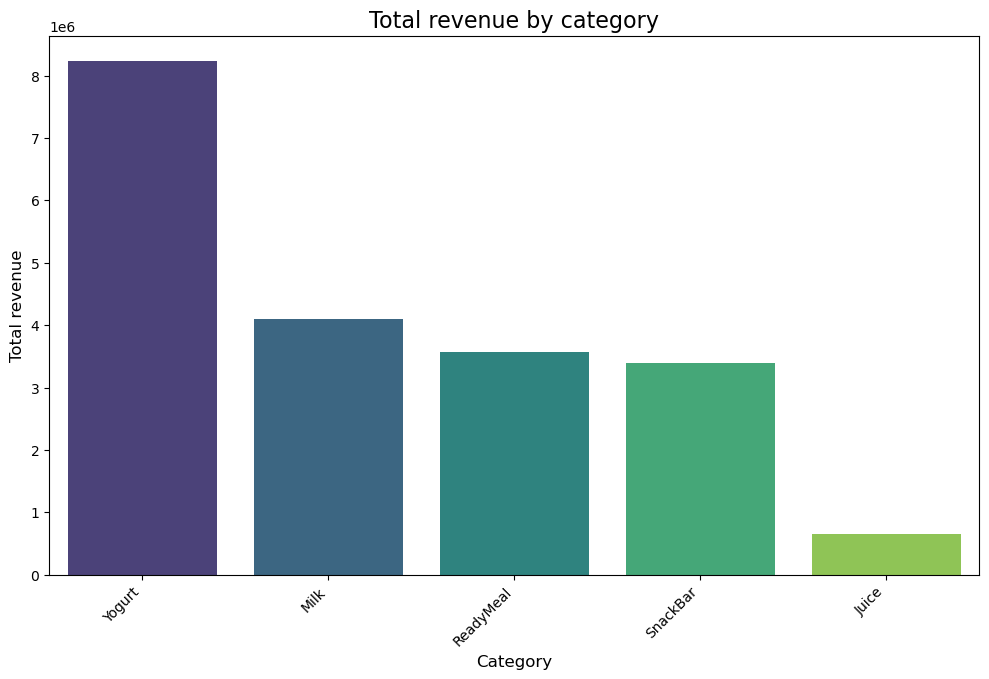

In [63]:
plt.figure(figsize=(12, 7))
category_Total_sales = df.groupby('category')['Total_price per transaction'].sum().sort_values(ascending=False)
sns.barplot(x=category_Total_sales.index, y=category_Total_sales.values, hue=category_Total_sales.index, palette='viridis', legend=False)
plt.title('Total revenue by category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

d. Total Units Sold by Region Let's see which regions are performing the best in terms of sales.

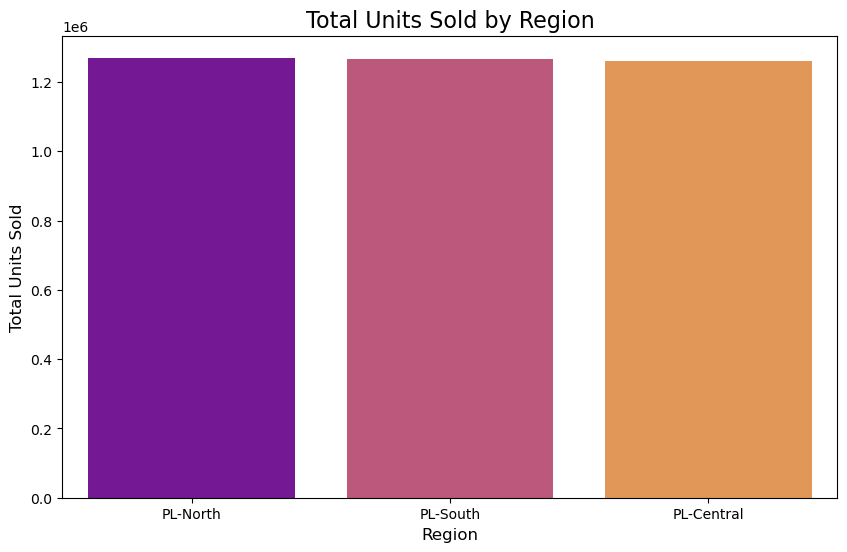

In [64]:
# Plotting total units sold by region
plt.figure(figsize=(10, 6))
region_sales = df.groupby('region')['units_sold'].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.index, y=region_sales.values, hue=region_sales.index, palette='plasma', legend=False)
plt.title('Total Units Sold by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Units Sold', fontsize=12)
plt.show()

e. No. of discounted transactions by category Let's see which regions are performing the best in terms of sales

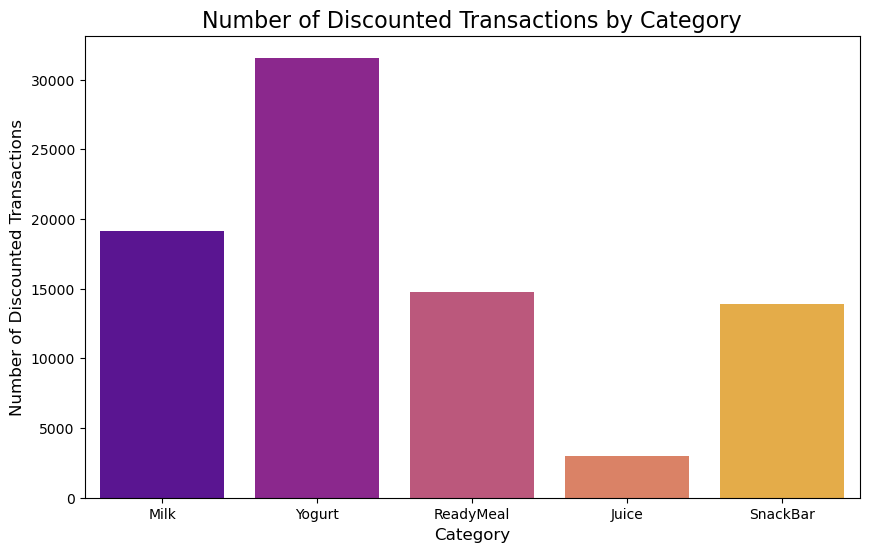

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['is_discounted'] == True], x='category', hue='category', palette='plasma',legend=False)
plt.title('Number of Discounted Transactions by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Discounted Transactions', fontsize=12)
plt.show()

Standardized feature scaling for numeric columns 

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X = df.drop(['units_sold_log'], axis=1)
y = df['units_sold_log']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [67]:
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns


In [68]:
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded  = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)


In [69]:
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

In [70]:
scaler = StandardScaler()
X_train_encoded[numeric_cols] = scaler.fit_transform(X_train_encoded[numeric_cols])
X_test_encoded[numeric_cols]  = scaler.transform(X_test_encoded[numeric_cols])

In [71]:
X_train_encoded = X_train_encoded.fillna(0)
X_test_encoded = X_test_encoded.fillna(0)
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

In [72]:
X_train_encoded = X_train_encoded.drop(columns=['date','units_sold','Total_price per transaction','sell_through_rate'], errors='ignore')
X_test_encoded  = X_test_encoded.drop(columns=['date','units_sold','Total_price per transaction','sell_through_rate'], errors='ignore')

In [73]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_encoded, y_train)

LinearRegression()

In [74]:
y_pred_train = model.predict(X_train_encoded)
y_pred_test = model.predict(X_test_encoded)

In [75]:
# Train evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

print("TRAIN MAE:", mae_train)
print("TRAIN RMSE:", rmse_train)
print("TRAIN R2:", r2_train)

TRAIN MAE: 0.2746381495455129
TRAIN RMSE: 0.3661003351275375
TRAIN R2: 0.670190521742056


In [76]:
# Test evaluation
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print("TEST MAE:", mae_test)
print("TEST RMSE:", rmse_test)
print("TEST R2:", r2_test)

TEST MAE: 0.27367243077825615
TEST RMSE: 0.36357935033631006
TEST R2: 0.6707076282590194


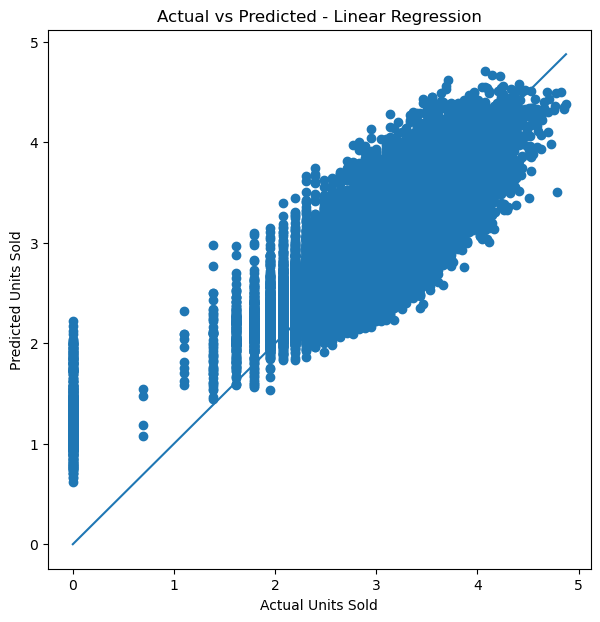

In [77]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Actual vs Predicted - Linear Regression")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.show()

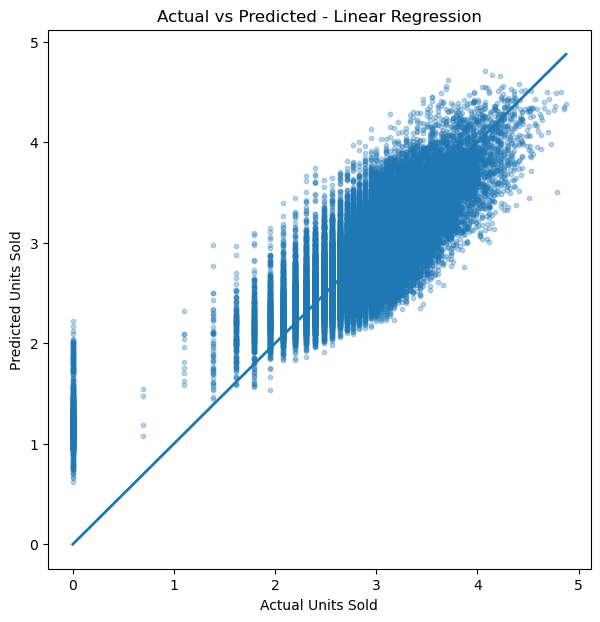

In [78]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_test, alpha=0.3, s=10)
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Actual vs Predicted - Linear Regression")

# Perfect line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linewidth=2)

plt.show()

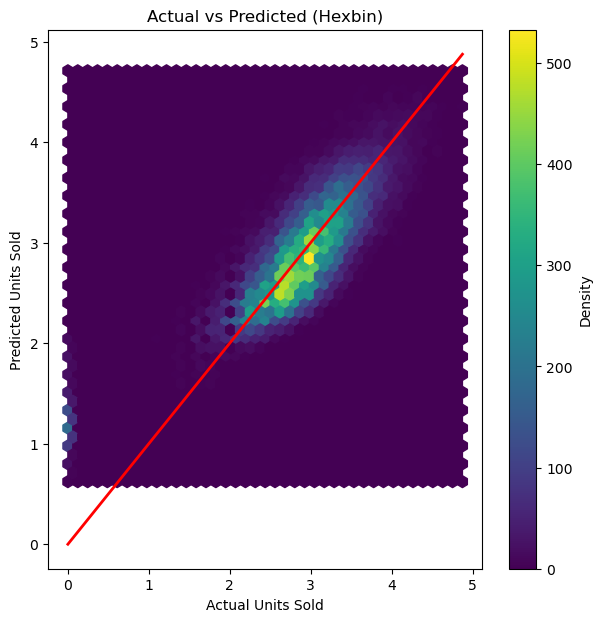

In [79]:
plt.figure(figsize=(7,7))
plt.hexbin(y_test, y_pred_test, gridsize=40)
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Actual vs Predicted (Hexbin)")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linewidth=2, color='red')
plt.colorbar(label='Density')
plt.show()

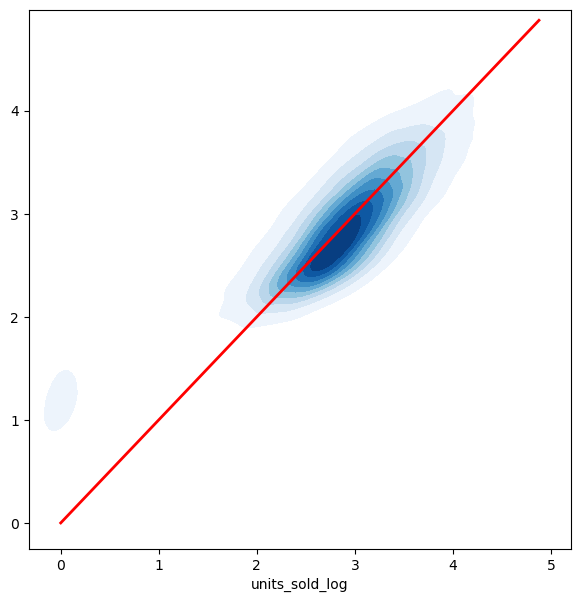

In [80]:
import seaborn as sns
plt.figure(figsize=(7,7))
sns.kdeplot(x=y_test, y=y_pred_test, fill=True, cmap="Blues")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linewidth=2, color='red')
plt.show()

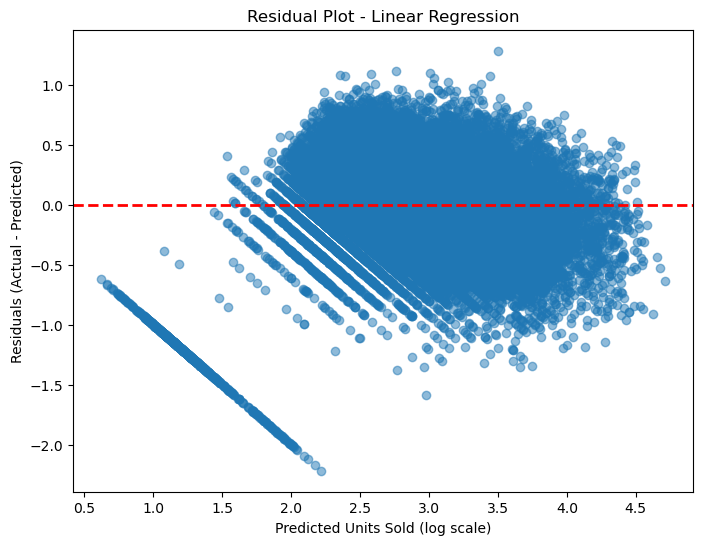

In [81]:
# Residuals: actual - predicted
residuals = y_test - y_pred_test

plt.figure(figsize=(8,6))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)

plt.xlabel("Predicted Units Sold (log scale)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot - Linear Regression")

plt.show()

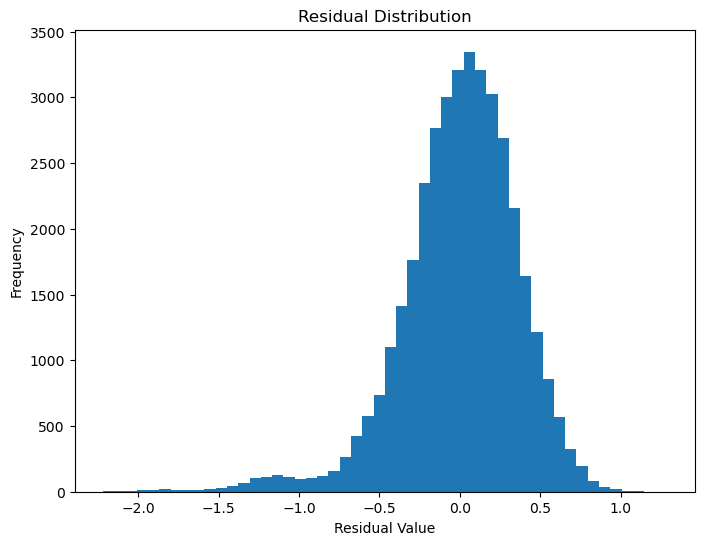

In [82]:
plt.figure(figsize=(8,6))
plt.hist(residuals, bins=50)
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.title("Residual Distribution")

plt.show()

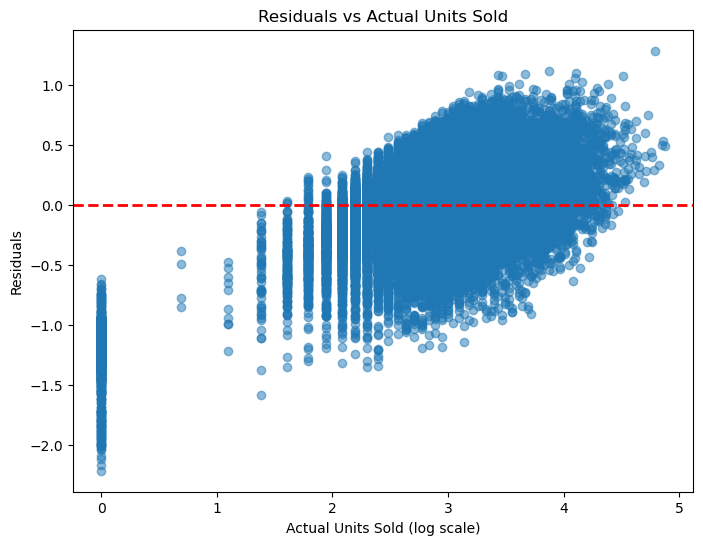

In [83]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)

plt.xlabel("Actual Units Sold (log scale)")
plt.ylabel("Residuals")
plt.title("Residuals vs Actual Units Sold")

plt.show()

In [84]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(
    random_state=42,
    max_depth=10,  
    min_samples_split=2,
    min_samples_leaf=1
)

In [85]:
dt_model.fit(X_train_encoded, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [86]:
dt_train_pred = dt_model.predict(X_train_encoded)
dt_test_pred  = dt_model.predict(X_test_encoded)


In [87]:
dt_train_mae  = mean_absolute_error(y_train, dt_train_pred)
dt_train_rmse = np.sqrt(mean_squared_error(y_train, dt_train_pred))
dt_train_r2   = r2_score(y_train, dt_train_pred)

print("\nDecision Tree (TRAIN) RESULTS:")
print("MAE: ",  dt_train_mae)
print("RMSE:",  dt_train_rmse)
print("R2:  ",  dt_train_r2)


Decision Tree (TRAIN) RESULTS:
MAE:  0.19915123984217392
RMSE: 0.25607507296719195
R2:   0.8386394037796419


In [88]:
dt_test_mae  = mean_absolute_error(y_test, dt_test_pred)
dt_test_rmse = np.sqrt(mean_squared_error(y_test, dt_test_pred))
dt_test_r2   = r2_score(y_test, dt_test_pred)

print("\nDecision Tree (TEST) RESULTS:")
print("MAE: ",  dt_test_mae)
print("RMSE:",  dt_test_rmse)
print("R2:  ",  dt_test_r2)


Decision Tree (TEST) RESULTS:
MAE:  0.2026456917411932
RMSE: 0.26009375688627623
R2:   0.8314832374232543


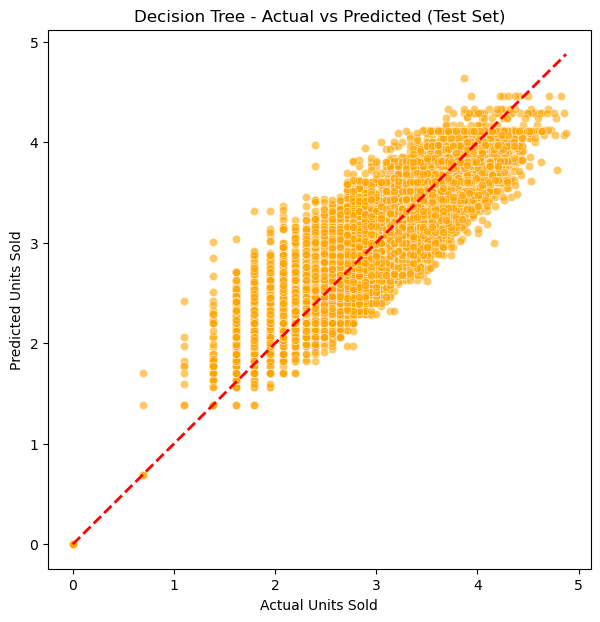

In [89]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=dt_test_pred, color='orange', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Decision Tree - Actual vs Predicted (Test Set)")
plt.show()

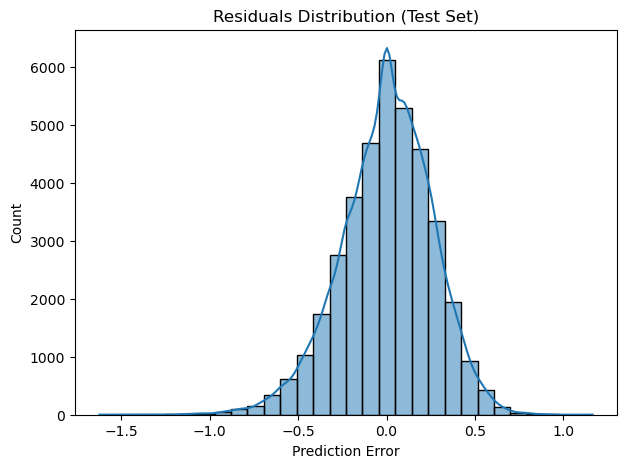

In [90]:
dt_residuals = y_test - dt_test_pred

plt.figure(figsize=(7, 5))
sns.histplot(dt_residuals, bins=30, kde=True)
plt.title("Residuals Distribution (Test Set)")
plt.xlabel("Prediction Error")
plt.show()

In [91]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(
    n_estimators=300, 
    max_depth=30,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42,
    n_jobs=-1
)

In [92]:
# Fit the model
rf_model.fit(X_train_encoded, y_train)

RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=300, n_jobs=-1, random_state=42)

In [93]:
rf_train_pred = rf_model.predict(X_train_encoded)
rf_test_pred  = rf_model.predict(X_test_encoded)


In [94]:
rf_train_mae  = mean_absolute_error(y_train, rf_train_pred)
rf_train_rmse = np.sqrt(mean_squared_error(y_train, rf_train_pred))
rf_train_r2   = r2_score(y_train, rf_train_pred)

print("\nRandom Forest (TRAIN) RESULTS:")
print("MAE: ",  rf_train_mae)
print("RMSE:",  rf_train_rmse)
print("R2:  ",  rf_train_r2)


Random Forest (TRAIN) RESULTS:
MAE:  0.09755883166856645
RMSE: 0.13118604298387188
R2:   0.9576514890300154


In [95]:
# ---- TEST SET ----
rf_test_mae  = mean_absolute_error(y_test, rf_test_pred)
rf_test_rmse = np.sqrt(mean_squared_error(y_test, rf_test_pred))
rf_test_r2   = r2_score(y_test, rf_test_pred)

print("\nRandom Forest (TEST) RESULTS:")
print("MAE: ",  rf_test_mae)
print("RMSE:",  rf_test_rmse)
print("R2:  ",  rf_test_r2)


Random Forest (TEST) RESULTS:
MAE:  0.18041212985075747
RMSE: 0.23304622188972807
R2:   0.8647094741601362


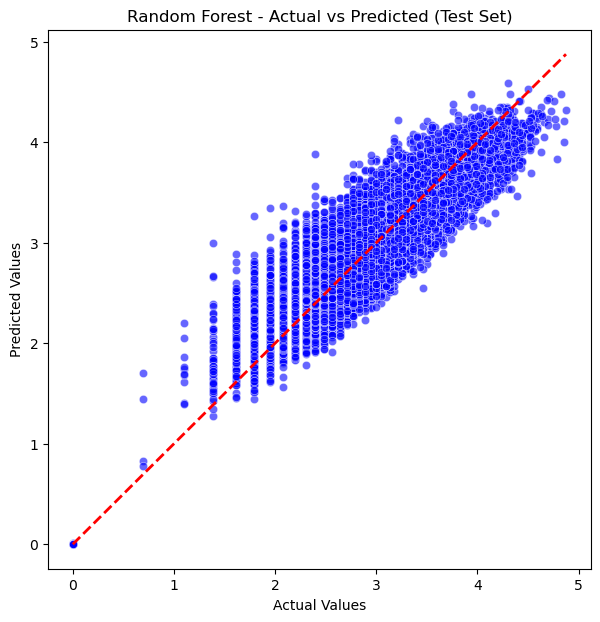

In [96]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x=y_test, y=rf_test_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest - Actual vs Predicted (Test Set)")
plt.show()

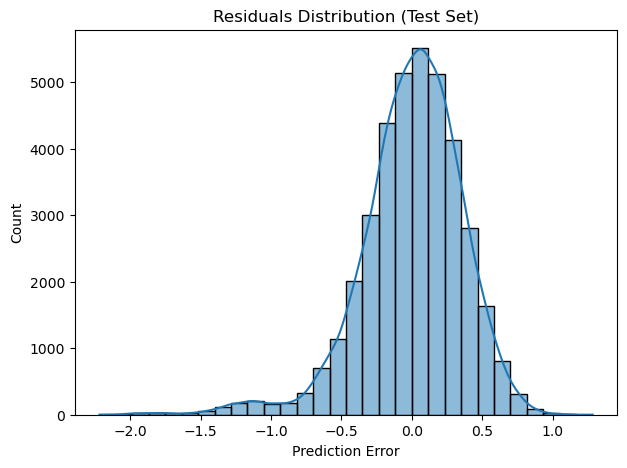

In [97]:
rf_residuals = y_test - rf_test_pred

plt.figure(figsize=(7, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution (Test Set)")
plt.xlabel("Prediction Error")
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17784\3174731387.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:15], y=features[indices][:15], palette="viridis")


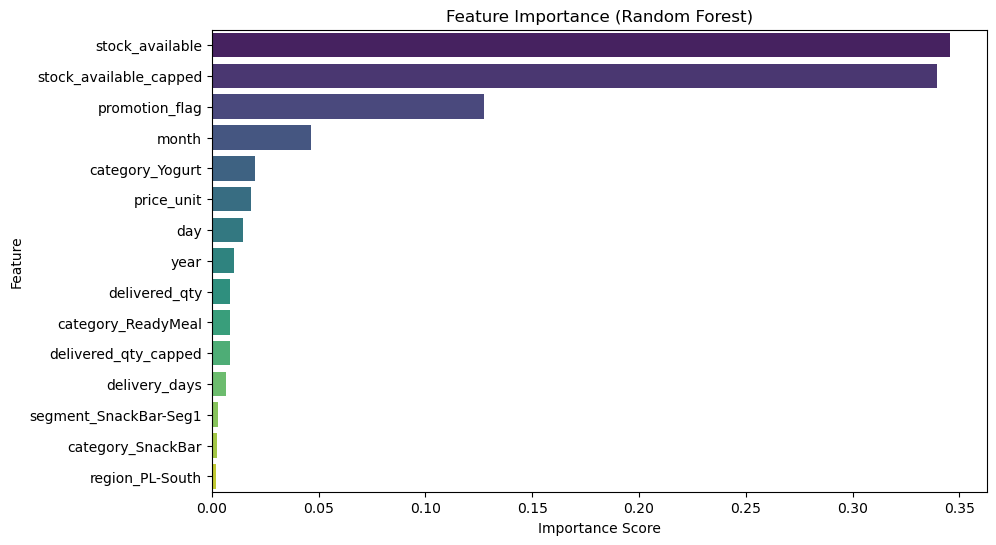

In [98]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train_encoded.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
sns.barplot(x=importances[indices][:15], y=features[indices][:15], palette="viridis")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [99]:
split_date = df['date'].quantile(0.8)

train = df[df['date'] <= split_date]
test  = df[df['date'] > split_date]

print("Train range:", train['date'].min(), "→", train['date'].max())
print("Test range:", test['date'].min(), "→", test['date'].max())

Train range: 2022-01-21 00:00:00 → 2024-07-18 00:00:00
Test range: 2024-07-19 00:00:00 → 2024-12-31 00:00:00


In [100]:
X_train_forecast = train.drop(columns=['units_sold_log'])
y_train_forecast = train['units_sold_log']

X_test_forecast = test.drop(columns=['units_sold_log'])
y_test_forecast = test['units_sold_log']

In [101]:
X_train_encoded_forecast = pd.get_dummies(X_train_forecast, columns=categorical_cols, drop_first=True)
X_test_encoded_forecast  = pd.get_dummies(X_test_forecast, columns=categorical_cols, drop_first=True)


In [102]:
scaler = StandardScaler()
X_train_encoded_forecast[numeric_cols] = scaler.fit_transform(X_train_encoded_forecast[numeric_cols])
X_test_encoded_forecast[numeric_cols]  = scaler.transform(X_test_encoded_forecast[numeric_cols])

In [103]:
X_train_encoded_forecast = X_train_encoded_forecast.drop(columns=['date','units_sold','Total_price per transaction','sell_through_rate'], errors='ignore')
X_test_encoded_forecast  = X_test_encoded_forecast.drop(columns=['date','units_sold','Total_price per transaction','sell_through_rate'], errors='ignore')

In [104]:
forecast_model = RandomForestRegressor(random_state=42)
forecast_model.fit(X_train_encoded_forecast, y_train_forecast)

RandomForestRegressor(random_state=42)

In [105]:
y_pred_train_forecast = forecast_model.predict(X_train_encoded_forecast)
y_pred_test_forecast = forecast_model.predict(X_test_encoded_forecast)

In [106]:
forecast_mae_train = mean_absolute_error(y_train_forecast, y_pred_train_forecast)
forecast_rmse_train = np.sqrt(mean_squared_error(y_train_forecast, y_pred_train_forecast))
forecast_r2_train = r2_score(y_train_forecast, y_pred_train_forecast)

print("TRAIN MAE:", forecast_mae_train)
print("TRAIN RMSE:", forecast_rmse_train)
print("TRAIN R2:", forecast_r2_train)

TRAIN MAE: 0.06818641181013764
TRAIN RMSE: 0.08875630136937898
TRAIN R2: 0.9807490924474339


In [109]:
forecast_mae_test = mean_absolute_error(y_test_forecast, y_pred_test_forecast)
forecast_rmse_test = np.sqrt(mean_squared_error(y_test_forecast, y_pred_test_forecast))
forecast_r2_test = r2_score(y_test_forecast, y_pred_test_forecast)

print("TEST MAE:", forecast_mae_test)
print("TEST RMSE:", forecast_rmse_test)
print("TEST R2:", forecast_r2_test)

TEST MAE: 0.18181619861880483
TEST RMSE: 0.23580787133410577
TEST R2: 0.8515968616599491


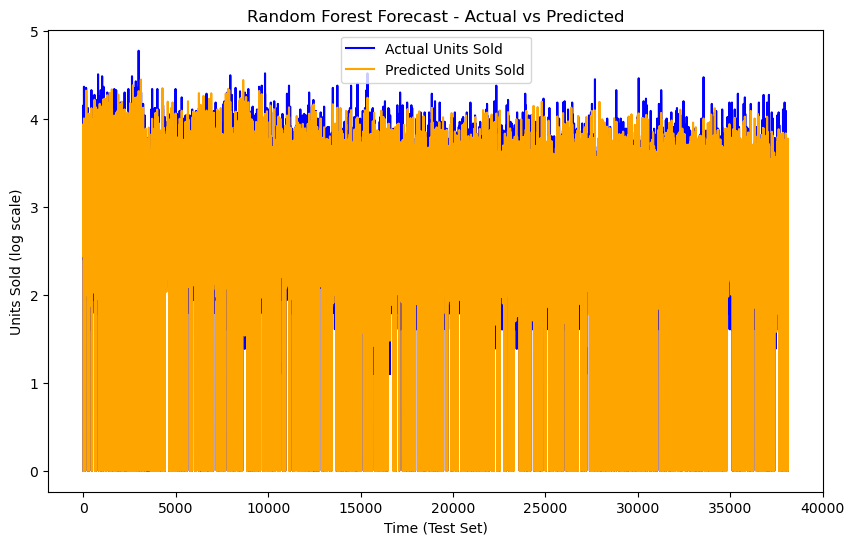

In [110]:
plt.figure(figsize=(10,6))
plt.plot(y_test_forecast.values, label='Actual Units Sold', color='blue')
plt.plot(y_pred_test_forecast, label='Predicted Units Sold', color='orange')
plt.title("Random Forest Forecast - Actual vs Predicted")
plt.xlabel("Time (Test Set)")
plt.ylabel("Units Sold (log scale)")
plt.legend()
plt.show()

In [114]:
forecast_df = pd.DataFrame({
    'date': test['date'].values,
    'Actual': y_test_forecast.values,
    'Predicted': y_pred_test_forecast
}).sort_values('date')

In [117]:
forecast_df['date'] = pd.to_datetime(forecast_df['date'])
forecast_monthly = forecast_df.resample('ME', on='date').mean()

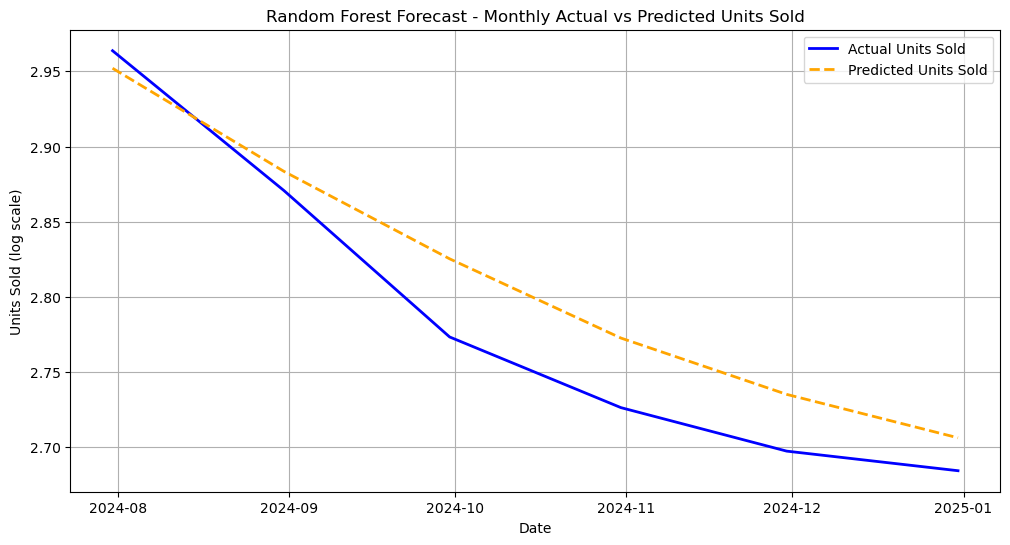

In [118]:
plt.figure(figsize=(12,6))
plt.plot(forecast_monthly.index, forecast_monthly['Actual'], label='Actual Units Sold', color='blue', linewidth=2)
plt.plot(forecast_monthly.index, forecast_monthly['Predicted'], label='Predicted Units Sold', color='orange', linestyle='--', linewidth=2)

plt.title("Random Forest Forecast - Monthly Actual vs Predicted Units Sold")
plt.xlabel("Date")
plt.ylabel("Units Sold (log scale)")
plt.legend()
plt.grid(True)
plt.show()